# FASTEDDY TUTORIAL VISUALIZATION AND ANALYSIS NOTEBOOK

# 1. Import the tutorial helper-functions from python file

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import math
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.colors as mcolors
import scipy.fftpack as fftpack
from scipy import interpolate

from fetutorialfunctions import *

# 2. Define parameters

In [2]:
##########################
# BEGIN USER EDIT REGION #
##########################

case = 'neutral'    # USER SELECTED CASE: 'stable', 'convective', or 'neutral'
zChoose = 5        # VERTICAL INDEX TO MAKE XY PLOTS
yChoose = 317 #64 #317 #317 #64       # Y-INDEX TO TAKE XZ PLOTS: use 317-neutral 300-convective 64-stable for y-center
path_base = "/glade/scratch/erichend/FastEddy/tutorial/"    # BASE PATH FOR FE OUTPUT
cases_FE = ['neutral3','convective3','stable3'] # SUBDIRECTORY PATHS TO EACH CASE
path_end = "/output/"      # FOR EACH CASE, SUBDIRECTORY PATHS TO OUTPUT
output_base = ["FE_NBL.","FE_CBL.","FE_SBL."]  # OUTPUT FILE NAMES FOR EACH CASE (NBL: NEUTRAL, CBL: CONVECTIVE, and SBL: STABLE)
FE_timestep = ['504000','540000','8640000']    # FINAL TIME STEPS OF CASES
save_plot_opt = 1          # 0-DO NOT SAVE PLOTS, 1-SAVE PLOTS
path_figure = '/glade/scratch/erichend/FastEddy/plots/tutorial/' # BASE PATH TO FIGURES IF save_plot_opt=1
FE_timestep_NBL = ['432000','450000','468000','486000','504000'] # Output files used for temporal averaging (NBL)
FE_timestep_CBL = ['360000','396000','432000','468000','504000','540000'] # Output files used for temporal averaging (CBL)
#FE_timestep_SBL = ['3600000','3780000','3960000','4140000','4320000'] # Output files used for temporal averaging (SBL)
FE_timestep_SBL = ['7200000','7560000','7920000','8280000','8640000']

########################
# END USER EDIT REGION #
########################

# 3. Open files

In [3]:
if case == 'neutral':
    indCase = 0
    FE_timestep_avg = FE_timestep_NBL
elif case == 'convective':
    indCase = 1
    FE_timestep_avg = FE_timestep_CBL
elif case == 'stable':
    indCase = 2
    FE_timestep_avg = FE_timestep_SBL

n_cases = len(cases_FE)
files_FE = []
for cc in range(0,len(cases_FE)):
    files_FE.append(path_base+cases_FE[cc]+path_end+output_base[cc]+FE_timestep[cc])

print('files_FE=',files_FE)

path_figure = path_figure 
if not os.path.exists(path_figure):
    os.makedirs(path_figure)
    
case_tmp = 'case_open'
case_open = case_tmp + '=xr.open_dataset(files_FE[indCase])'
print(case_open)
exec(case_open)

files_FE= ['/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.504000', '/glade/scratch/erichend/FastEddy/tutorial/convective3/output/FE_CBL.540000', '/glade/scratch/erichend/FastEddy/tutorial/stable3/output/FE_SBL.8640000']
case_open=xr.open_dataset(files_FE[indCase])


# 4. Plot XY cross sections 

/glade/scratch/erichend/FastEddy/plots/tutorial/UVWTHETA-XY-neutral.png


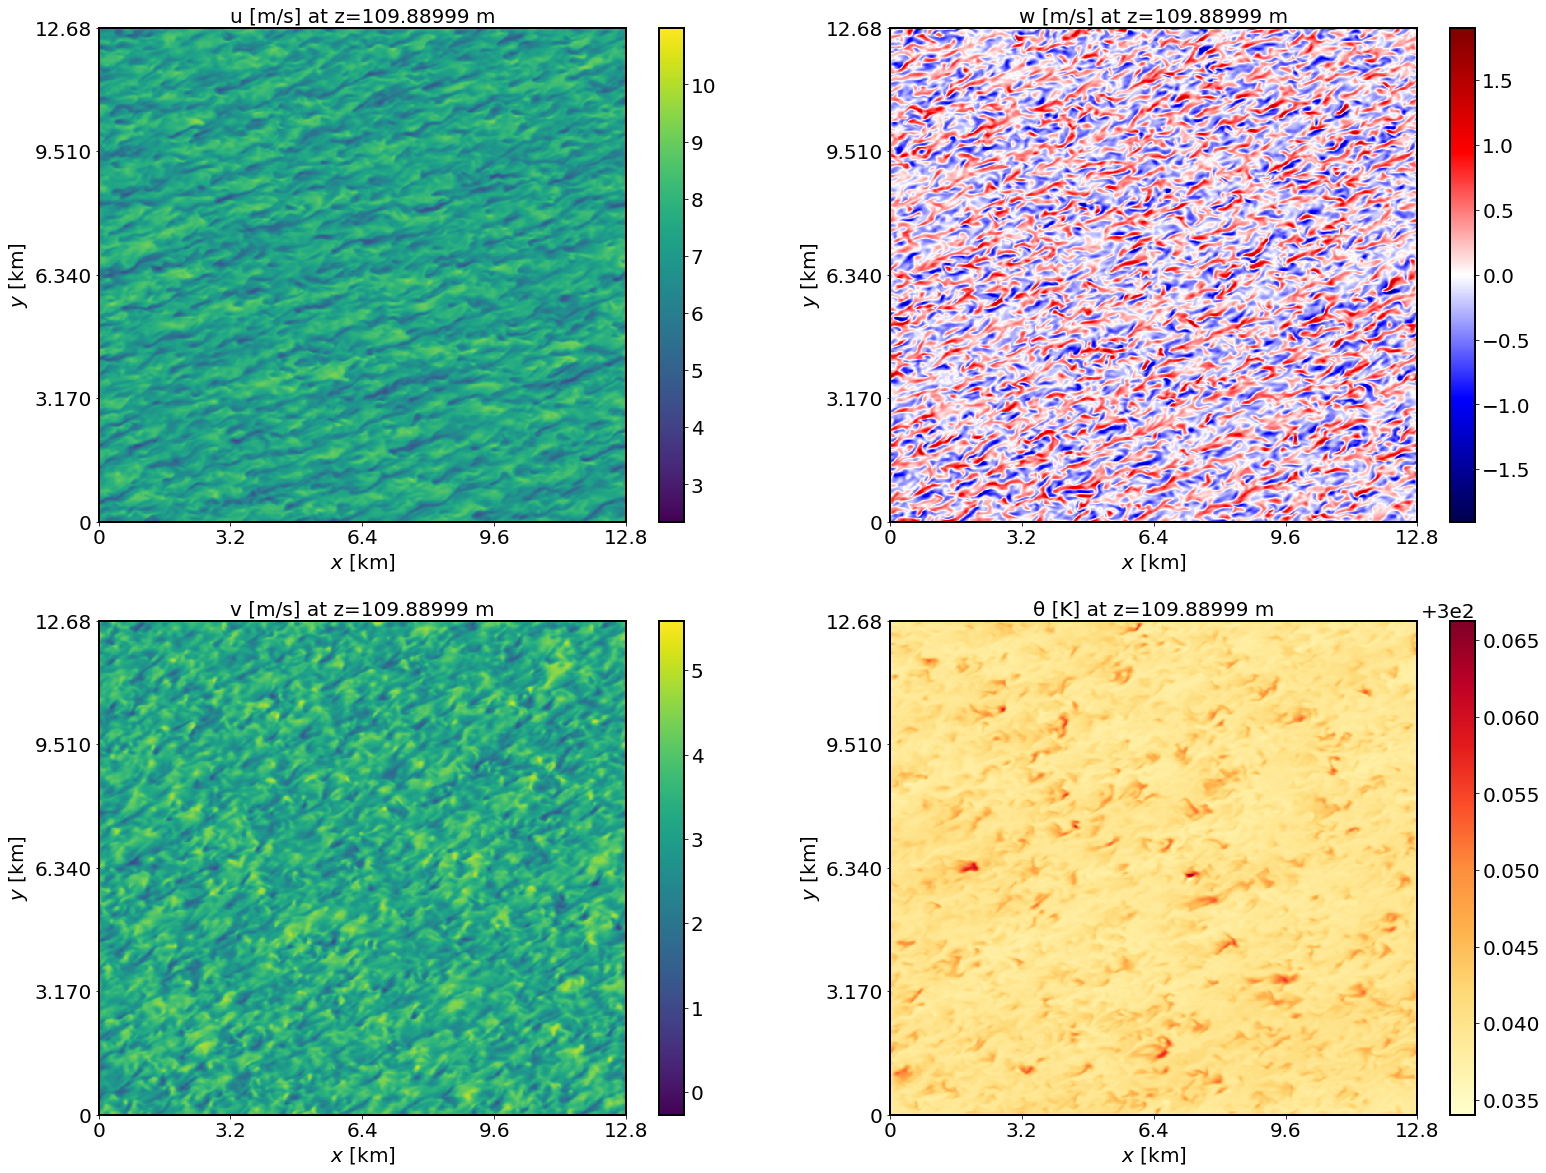

In [35]:
plot_XY_UVWTHETA(case, case_open, zChoose, save_plot_opt, path_figure)

# 5. Plot XZ cross sections 

1148.85
/glade/scratch/erichend/FastEddy/plots/tutorial/UVWTHETA-XZ-neutral.png


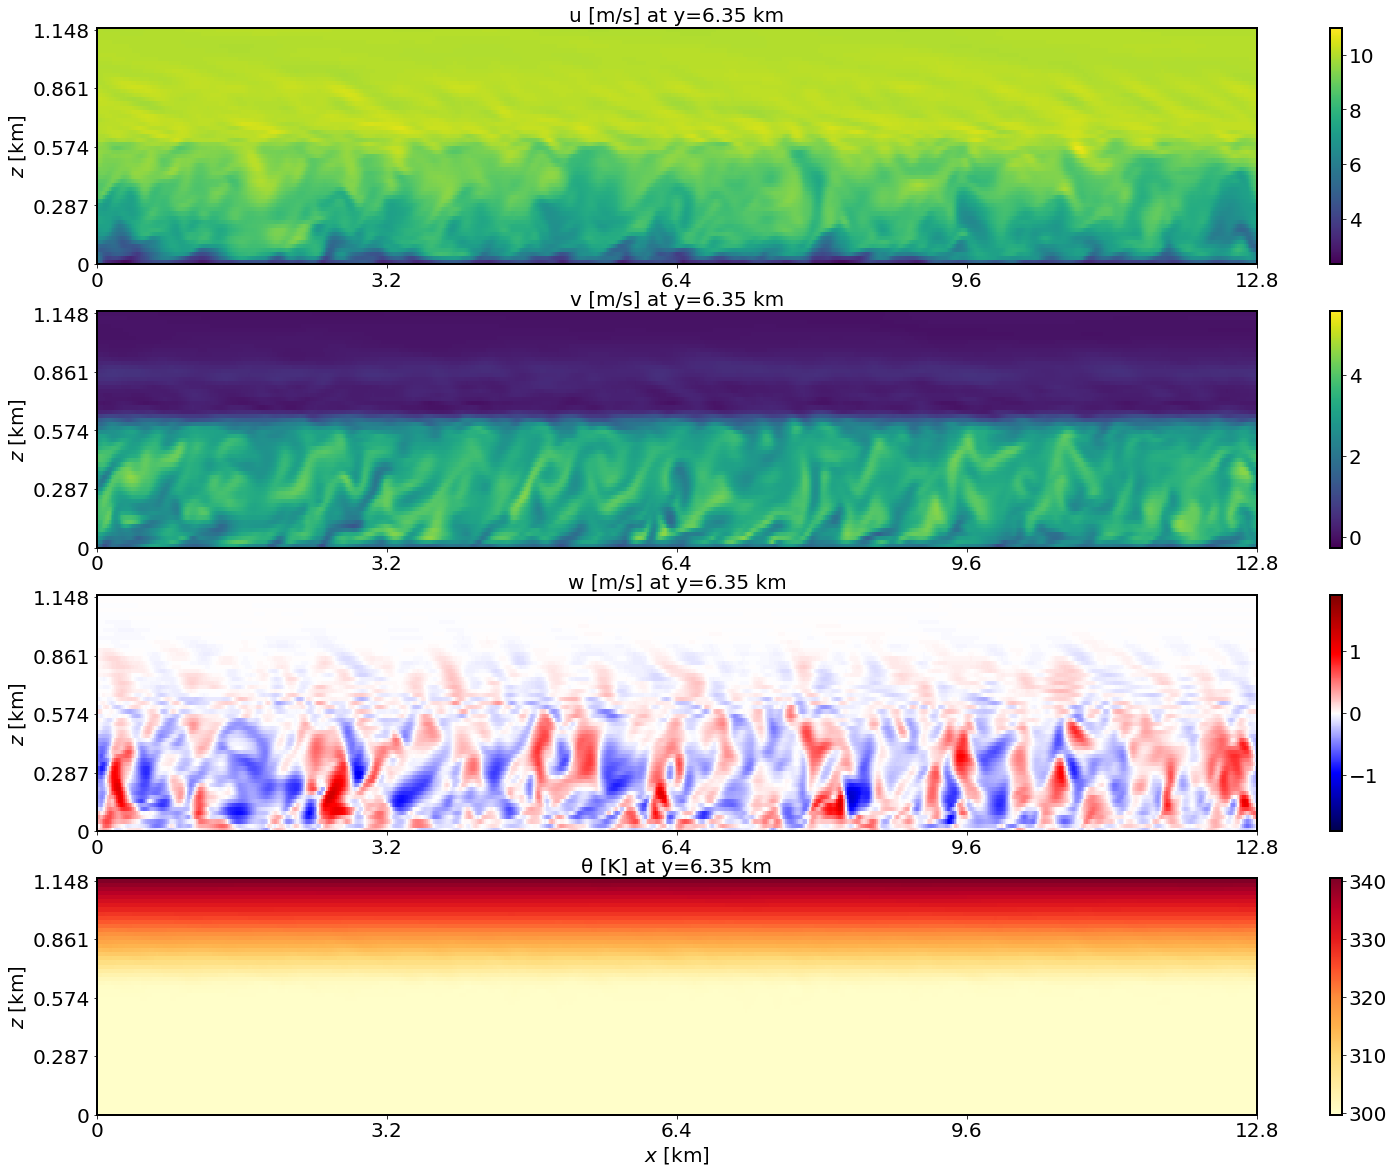

In [36]:
plot_XZ_UVWTHETA(case, case_open, yChoose, save_plot_opt, path_figure)

# 6. Plot mean vertical profiles of state variables

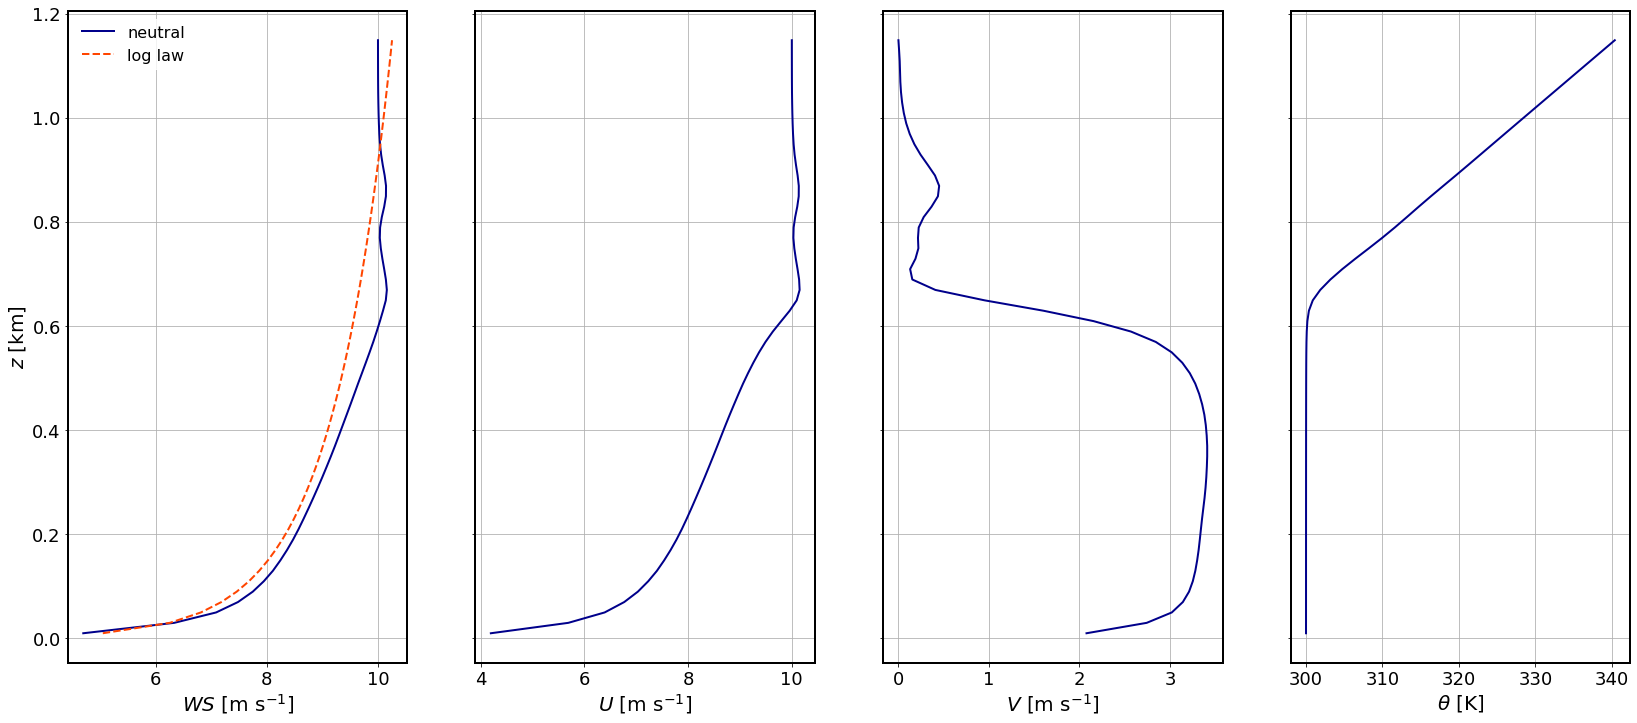

In [5]:
#plot_mean_profiles(case, case_open, save_plot_opt, path_figure)
numPlotsX = 1
numPlotsY = 4
sizeX = 28
sizeY = 12
fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
plot_mean_profiles(fig, axs, case_open.isel(time=0), 'neutral', 'spatial', False, path_figure, caseCnt=0)

# 7. Plot mean vertical profiles of turbulent quantities

In [38]:
FE_turb_tmp=0.0
for dd in range(0,len(FE_timestep_avg)):
    file_FE_tmp = path_base+cases_FE[indCase]+path_end+output_base[indCase]+FE_timestep_avg[dd]
    print(file_FE_tmp)
    FE_turb_xr_tmp = xr.open_dataset(file_FE_tmp)
    FE_turb_tmp = compute_turb_profiles(FE_turb_xr_tmp, FE_turb_tmp, case, save_plot_opt, path_figure)
    
print(FE_turb_tmp.shape)

/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.432000
/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.450000
/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.468000
/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.486000
/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.504000
(58, 15)


/glade/scratch/erichend/FastEddy/plots/tutorial/TURB-PROF-neutral.png


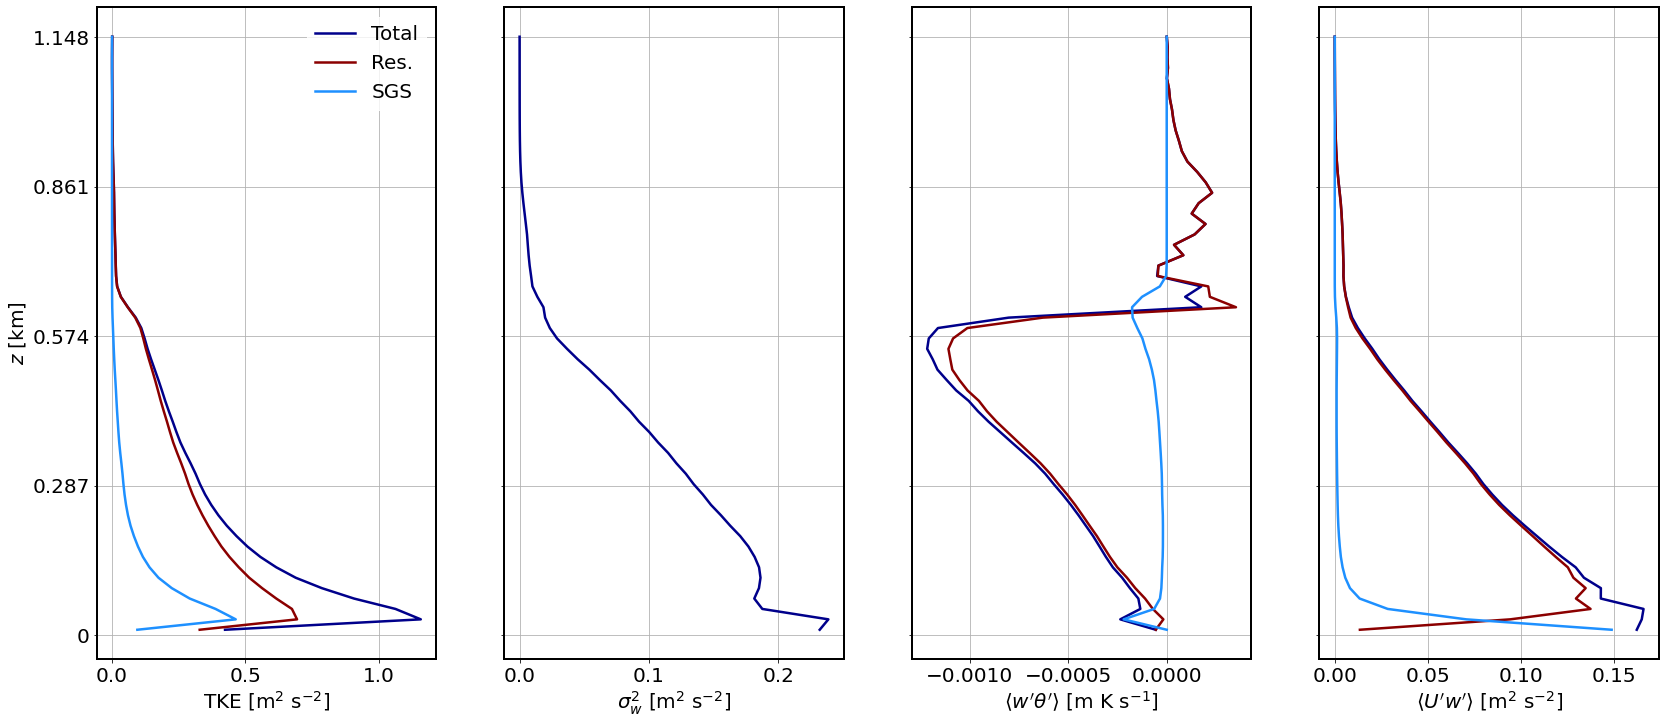

In [39]:
plot_turb_profiles(case,case_open,FE_turb_tmp,save_plot_opt, path_figure)

In [40]:
# Other plots TBD (spectra, etc.)